**파일 업로드 및 확인**

In [1]:
import pandas as pd

data = pd.read_csv('Gold_I.csv')
print(data.head())
print(data.info())


         matchId      gameId gameMode    gameVersion championName  championId  \
0  KR_6983296155  6983296155  CLASSIC  14.5.565.1230     Pantheon          80   
1  KR_6991296940  6991296940  CLASSIC  14.5.565.1230         Sona          37   
2  KR_6895335668  6895335668  CLASSIC  14.1.552.7117       LeeSin          64   
3  KR_6895335668  6895335668  CLASSIC  14.1.552.7117        Leona          89   
4  KR_6903819106  6903819106  CLASSIC  14.1.553.2414      Caitlyn          51   

  teamPosition   win  allInPings  assistMePings  ...  jungleCsBefore10Minutes  \
0       MIDDLE  True           0              0  ...                      0.0   
1      UTILITY  True           0              4  ...                      0.0   
2       JUNGLE  True           1              5  ...                     28.0   
3      UTILITY  True           0              2  ...                      0.0   
4       BOTTOM  True           0              4  ...                      0.0   

   enemyJungleMonsterKills

In [2]:
# 전체 통계 세부정보
data.describe(include='all')

,matchId,gameId,gameMode,gameVersion,championName,championId,teamPosition,win,allInPings,assistMePings,...,jungleCsBefore10Minutes,enemyJungleMonsterKills,controlWardsPlaced,wardTakedowns,kda,teamDamagePercentage,maxCsAdvantageOnLaneOpponent,maxLevelLeadLaneOpponent,primaryStyle,subStyle
count,366760,3.667600e+05,366760,366760,366760,366760.000000,366382,366760,366760.000000,366760.000000,...,365205.000000,365205.000000,365205.000000,365205.000000,365205.000000,364405.000000,353375.00000,353375.000000,366760,366760
unique,36676,NaN,1,23,167,NaN,5,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566,367
top,KR_6983296155,NaN,CLASSIC,14.1.553.2414,Yone,NaN,MIDDLE,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8229, 8226, 8210, 8237","8345, 8347"
freq,10,NaN,366760,56280,10115,NaN,73282,183380,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28712,30445
mean,NaN,6.966387e+09,NaN,NaN,NaN,194.486032,NaN,NaN,0.229616,2.314647,...,10.199459,2.008565,1.470807,2.949689,3.201783,0.200000,24.91830,1.555000,NaN,NaN
std,NaN,4.709680e+07,NaN,NaN,NaN,236.881869,NaN,NaN,0.922188,4.369024,...,20.943679,4.852340,2.083435,3.699089,3.674416,0.092618,29.34255,0.962484,NaN,NaN
min,NaN,6.894185e+09,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,NaN,NaN
25%,NaN,6.924645e+09,NaN,NaN,NaN,51.000000,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.090909,0.138092,4.00000,1.000000,NaN,NaN
50%,NaN,6.962567e+09,NaN,NaN,NaN,99.000000,NaN,NaN,0.000000,1.000000,...,0.000000,0.000000,1.000000,2.000000,2.000000,0.192178,14.00000,1.000000,NaN,NaN
75%,NaN,7.003390e+09,NaN,NaN,NaN,234.000000,NaN,NaN,0.000000,3.000000,...,0.000000,1.000000,2.000000,4.000000,3.857143,0.251759,36.00000,2.000000,NaN,NaN


**전처리 1: 필요없는 열 삭제**

In [3]:
# kda 열은 kills, assists, deaths 열이 존재하기에 삭제하였다.
if 'Unnamed: 0' in data.columns:
    data.drop(['Unnamed: 0', 'kda'], axis=1, inplace=True)
else:
    data.drop(['kda'], axis=1, inplace=True)
data.head()

,matchId,gameId,gameMode,gameVersion,championName,championId,teamPosition,win,allInPings,assistMePings,...,visionScorePerMinute,jungleCsBefore10Minutes,enemyJungleMonsterKills,controlWardsPlaced,wardTakedowns,teamDamagePercentage,maxCsAdvantageOnLaneOpponent,maxLevelLeadLaneOpponent,primaryStyle,subStyle
0,KR_6983296155,6983296155,CLASSIC,14.5.565.1230,Pantheon,80,MIDDLE,True,0,0,...,1.113485,0.0,9.0,4.0,3.0,0.217692,18.0,1.0,"8010, 9111, 9104, 8014","8126, 8106"
1,KR_6991296940,6991296940,CLASSIC,14.5.565.1230,Sona,37,UTILITY,True,0,4,...,2.128987,0.0,0.0,2.0,4.0,0.121638,1.0,2.0,"8214, 8226, 8210, 8237","8017, 8009"
2,KR_6895335668,6895335668,CLASSIC,14.1.552.7117,LeeSin,64,JUNGLE,True,1,5,...,0.868467,28.0,10.0,3.0,5.0,0.194136,0.0,0.0,"8112, 8143, 8138, 8106","8014, 9111"
3,KR_6895335668,6895335668,CLASSIC,14.1.552.7117,Leona,89,UTILITY,True,0,2,...,2.976526,0.0,0.0,10.0,14.0,0.084814,11.0,2.0,"8439, 8463, 8473, 8242","8345, 8347"
4,KR_6903819106,6903819106,CLASSIC,14.1.553.2414,Caitlyn,51,BOTTOM,True,0,4,...,0.228309,0.0,0.0,0.0,1.0,0.127667,2.0,1.0,"8021, 8009, 9103, 8014","8233, 8236"


**전처리 2: NaN 또는 Null 값 확인 및 처리**

In [4]:
# NaN 및 Null 포함도 확인
print((data.isnull().sum()/len(data)*100).sort_values(ascending=False)[:20])

maxLevelLeadLaneOpponent        3.649526
maxCsAdvantageOnLaneOpponent    3.649526
killParticipation               2.594340
teamDamagePercentage            0.642109
turretTakedowns.1               0.423983
takedowns                       0.423983
goldPerMinute                   0.423983
damagePerMinute                 0.423983
baronTakedowns                  0.423983
dragonTakedowns                 0.423983
gameLength                      0.423983
visionScorePerMinute            0.423983
jungleCsBefore10Minutes         0.423983
enemyJungleMonsterKills         0.423983
controlWardsPlaced              0.423983
wardTakedowns                   0.423983
teamPosition                    0.103065
summoner2Casts                  0.000000
spell4Casts                     0.000000
spell3Casts                     0.000000
dtype: float64


In [5]:
# 비슷한 범주형 데이터가 있으므로 삭제한다.
data = data.dropna(subset=['teamPosition'])

In [6]:
# 수치형 데이터 중앙값으로 채움
columns_to_impute = [
    'maxLevelLeadLaneOpponent', 'maxCsAdvantageOnLaneOpponent', 'killParticipation',
    'teamDamagePercentage', 'jungleCsBefore10Minutes', 'goldPerMinute', 
    'damagePerMinute', 'baronTakedowns', 'dragonTakedowns', 'turretTakedowns.1',
    'gameLength', 'visionScorePerMinute', 'takedowns', 'enemyJungleMonsterKills',
    'controlWardsPlaced', 'wardTakedowns'
]
for col in columns_to_impute:
    data[col] = data[col].fillna(data[col].median())


In [7]:
# 이 중 NaN 또는 Null 존재 시 삭제
data = data.dropna(subset=columns_to_impute)

In [8]:
print(data.isnull().sum())

matchId                         0
gameId                          0
gameMode                        0
gameVersion                     0
championName                    0
                               ..
teamDamagePercentage            0
maxCsAdvantageOnLaneOpponent    0
maxLevelLeadLaneOpponent        0
primaryStyle                    0
subStyle                        0
Length: 133, dtype: int64


**범주형 데이터와 수치형 데이터 확인**

In [9]:
# 범주형 데이터와 수치형 데이터 출력
numeric_columns = data.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numeric_columns)


Categorical Columns: ['matchId', 'gameMode', 'gameVersion', 'championName', 'teamPosition', 'individualPosition', 'lane', 'role', 'primaryStyle', 'subStyle']
Numerical Columns: ['gameId', 'championId', 'win', 'allInPings', 'assistMePings', 'assists', 'baronKills', 'basicPings', 'champExperience', 'champLevel', 'championTransform', 'commandPings', 'consumablesPurchased', 'damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets', 'damageSelfMitigated', 'dangerPings', 'deaths', 'detectorWardsPlaced', 'doubleKills', 'dragonKills', 'eligibleForProgression', 'enemyMissingPings', 'enemyVisionPings', 'firstBloodAssist', 'firstBloodKill', 'firstTowerAssist', 'firstTowerKill', 'gameEndedInEarlySurrender', 'gameEndedInSurrender', 'getBackPings', 'goldEarned', 'goldSpent', 'holdPings', 'inhibitorKills', 'inhibitorTakedowns', 'inhibitorsLost', 'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'itemsPurchased', 'killingSprees', 'kills', 'largestCriticalStrike', 'larges

In [15]:
# 동일 값 포함도 그래프 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=data, x=column)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

**전처리 3: 인코딩 및 임베딩**

In [10]:
# 범주형 데이터 인코딩
from sklearn.preprocessing import LabelEncoder

label_encoders = {feature: LabelEncoder() for feature in categorical_columns}
for feature in categorical_columns:
    data[feature] = label_encoders[feature].fit_transform(data[feature])


In [11]:
data.fillna(data.mean(), inplace=True)
data.head(12)

,matchId,gameId,gameMode,gameVersion,championName,championId,teamPosition,win,allInPings,assistMePings,...,visionScorePerMinute,jungleCsBefore10Minutes,enemyJungleMonsterKills,controlWardsPlaced,wardTakedowns,teamDamagePercentage,maxCsAdvantageOnLaneOpponent,maxLevelLeadLaneOpponent,primaryStyle,subStyle
0,23201,6983296155,0,13,96,80,2,True,0,0,...,1.113485,0.00,9.0,4.0,3.0,0.217692,18.0,1.0,91,51
1,25110,6991296940,0,13,124,37,4,True,0,4,...,2.128987,0.00,0.0,2.0,4.0,0.121638,1.0,2.0,265,18
2,337,6895335668,0,1,68,64,1,True,1,5,...,0.868467,28.00,10.0,3.0,5.0,0.194136,0.0,0.0,178,16
3,337,6895335668,0,1,69,89,4,True,0,2,...,2.976526,0.00,0.0,10.0,14.0,0.084814,11.0,2.0,491,240
4,2924,6903819106,0,3,18,51,0,True,0,4,...,0.228309,0.00,0.0,0.0,1.0,0.127667,2.0,1.0,101,147
5,29410,7014612141,0,18,103,421,3,True,0,1,...,0.879262,0.00,1.0,2.0,1.0,0.138461,6.0,1.0,442,352
6,19014,6965376832,0,10,2,84,2,True,0,1,...,0.799405,0.00,0.0,2.0,2.0,0.207584,1.0,1.0,114,303
7,2743,6903294778,0,3,74,99,4,False,0,7,...,1.902776,0.00,0.0,5.0,4.0,0.211871,49.0,3.0,295,240
8,5646,6912931867,0,3,152,19,1,False,1,0,...,0.790577,42.25,3.0,0.0,5.0,0.276489,39.7,3.0,23,28
9,15767,6951513861,0,8,1,103,2,True,0,1,...,0.889084,0.00,0.0,0.0,1.0,0.199857,53.0,2.0,162,113


**TabTransformer 설정 및 학습**

In [12]:
# 학습에 필요한 라이브러리
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

In [13]:
# 데이터 세팅 및 수치형 데이터 인코딩
scaler = StandardScaler()
X_num = scaler.fit_transform(data[numeric_columns])

X_cat = torch.tensor(data[categorical_columns].values, dtype=torch.long)
X_num = torch.tensor(X_num, dtype=torch.float)
y = torch.tensor(data['win'].values, dtype=torch.float)

dataset = TensorDataset(X_cat, X_num, y)
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset, batch_size=64, shuffle=False)

In [14]:
# TabTransformer 초기 설정 클래스
class TabTransformer(nn.Module):
    def __init__(self, num_categories, embed_dim, num_heads, num_layers, dropout_rate):
        super(TabTransformer, self).__init__()
        self.embed_dim = embed_dim
        self.embeddings = nn.ModuleList([nn.Embedding(num_categories[i], embed_dim) for i in range(len(num_categories))])
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dropout=dropout_rate)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.regressor = nn.Linear(embed_dim * len(num_categories) + len(numeric_columns), 1)
        
        self._init_weights()

    def _init_weights(self):
        nn.init.xavier_uniform_(self.regressor.weight)
        for embedding in self.embeddings:
            nn.init.xavier_uniform_(embedding.weight)
        
    def forward(self, x_cat, x_num):
        x = [self.embeddings[i](x_cat[:, i]) for i in range(len(self.embeddings))]
        x = torch.stack(x, dim=1)
        x = self.transformer_encoder(x).view(x.size(0), -1)
        x = torch.cat((x, x_num), dim=1)
        output = self.regressor(x)
        return output

In [16]:
from tqdm import tqdm

# 학습을 위한 설정 함수
def train(model, train_loader, val_loader, epochs, criterion, optimizer, device):
    model.train()

    for epoch in range(epochs):
        train_loss = 0
        # tqdm 추가 - 학습 데이터 로더에 적용
        for (x_cat, x_num, labels) in tqdm(train_loader, desc=f"Epoch {epoch+1} Training"):
            x_cat, x_num, labels = x_cat.to(device), x_num.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(x_cat, x_num)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        val_loss = 0
        # tqdm 추가 - 검증 데이터 로더에 적용
        with torch.no_grad():
            for (x_cat, x_num, labels) in tqdm(val_loader, desc=f"Epoch {epoch+1} Validation"):
                x_cat, x_num, labels = x_cat.to(device), x_num.to(device), labels.to(device)
                outputs = model(x_cat, x_num)
                val_loss += criterion(outputs.squeeze(), labels).item()
        
        val_loss /= len(val_loader)
        
        print(f"Epoch {epoch+1}: Train Loss = {train_loss / len(train_loader) * 100:.2f}%, Val Loss = {val_loss * 100:.2f}%")


In [18]:
# 모델, 손실 함수, 옵티마이저 설정
num_categories = [data[cat].nunique() for cat in categorical_columns]
model = TabTransformer(num_categories=num_categories, embed_dim=32, num_heads=8, num_layers=6, dropout_rate=0.1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # 학습률을 낮추었습니다.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 훈련 시작
train(model, train_loader, val_loader, epochs=10, criterion=criterion, optimizer=optimizer, device=device)

c:\Users\htu12\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch 1 Training:   3%|▎         | 188/5725 [00:26<12:47,  7.21it/s]


KeyboardInterrupt: 

**모델 성능 확인, 저장**

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# 모델 성능 평가 함수
def evaluate(model, loader, device):
    model.eval()
    all_labels = []
    all_outputs = []
    with torch.no_grad():
        for (x_cat, x_num, labels) in loader:
            x_cat, x_num, labels = x_cat.to(device), x_num.to(device), labels.to(device)
            outputs = model(x_cat, x_num)
            all_labels.append(labels.cpu().numpy())
            all_outputs.append(outputs.cpu().numpy())
    
    all_labels = np.concatenate(all_labels)
    all_outputs = np.concatenate(all_outputs)
    predictions = (all_outputs > 0.5).astype(int)
    
    accuracy = accuracy_score(all_labels, predictions)
    precision = precision_score(all_labels, predictions)
    recall = recall_score(all_labels, predictions)
    f1 = f1_score(all_labels, predictions)
    roc_auc = roc_auc_score(all_labels, all_outputs)
    
    return accuracy, precision, recall, f1, roc_auc

In [ ]:
# 그래프 생성 함수
def plot_metrics(metrics):
    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
    plt.figure(figsize=(10, 6))
    plt.bar(metric_names, metrics, color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.ylim(0, 1)
    for i, value in enumerate(metrics):
        plt.text(i, value + 0.02, f"{value:.2f}", ha='center')
    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.title('Model Performance Metrics')
    plt.show()

Accuracy: 0.70
Precision: 0.79
Recall: 0.56
F1 Score: 0.65
ROC AUC: 0.80


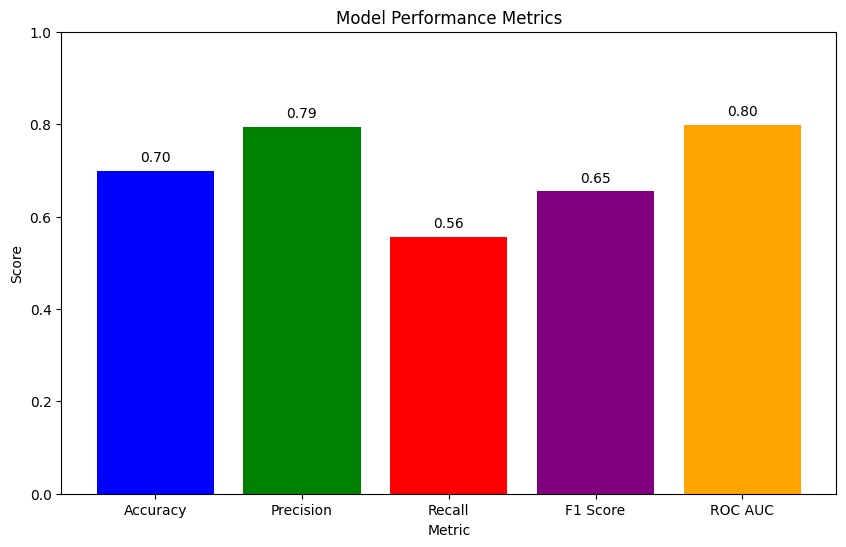

In [ ]:
# 성능 출력
accuracy, precision, recall, f1, roc_auc = evaluate(model, val_loader, device)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# 성능 지표 시각화
plot_metrics([accuracy, precision, recall, f1, roc_auc])

In [ ]:
torch.save(model.state_dict(), 'TabTransformer_model.pth')

**모델 실제 사용 시 과정과 결과**

실제 사용 시 챔피언 종류(championId, championName)와 룬(perk)만을 이용하여 조합을 보고 예측을 해야한다. (Input 2개 -> Output 1개)

In [ ]:
test_data = pd.read_csv('../test_data.csv')

test_data.head()

,Unnamed: 0,championName,championId,primaryStyle,subStyle
0,10,Yasuo,157,"8008, 9111, 9104, 8299","8242, 8473"
1,11,Caitlyn,51,"8021, 8009, 9103, 8014","8233, 8236"
2,12,Zeri,221,"8008, 9111, 9104, 8299","8429, 8451"
3,13,Leona,89,"8439, 8463, 8473, 8242","8345, 8347"
4,14,Xerath,101,"8229, 8226, 8210, 8237","8304, 8345"


In [ ]:
test_data.drop('Unnamed: 0', axis=1, inplace=True)

test_data.head()

,championName,championId,primaryStyle,subStyle
0,Yasuo,157,"8008, 9111, 9104, 8299","8242, 8473"
1,Caitlyn,51,"8021, 8009, 9103, 8014","8233, 8236"
2,Zeri,221,"8008, 9111, 9104, 8299","8429, 8451"
3,Leona,89,"8439, 8463, 8473, 8242","8345, 8347"
4,Xerath,101,"8229, 8226, 8210, 8237","8304, 8345"


In [ ]:
# 범주형 데이터 인코딩
test_categorical_columns = test_data.select_dtypes(include=['object']).columns.tolist()
test_numeric_columns = test_data.select_dtypes(exclude=['object']).columns.tolist()
print(test_categorical_columns, test_numeric_columns)

test_label_encoders = {test_feature: LabelEncoder().fit(test_data[test_feature]) for test_feature in test_categorical_columns}
for test_feature in test_categorical_columns:
    test_data[test_feature] = test_label_encoders[test_feature].fit_transform(test_data[test_feature])

print(test_data)

['championName', 'primaryStyle', 'subStyle'] ['championId']
   championName  championId  primaryStyle  subStyle
0             7         157             1         2
1             2          51             4         1
2             9         221             1         5
3             3          89             7         4
4             6         101             5         3
5             5         113             6         9
6             1          84             2         7
7             8         777             1         6
8             4          80             0         0
9             0         266             3         8


In [ ]:
# 범주형 변수 카테고리 수를 리스트로 변환
test_num_categories = [test_data[col].nunique() for col in test_categorical_columns]
print("Number of categories for each column:", test_num_categories)

Number of categories for each column: [10, 8, 10]


In [ ]:
# 데이터 세팅 및 수치형 데이터 인코딩
test_scaler = StandardScaler()
test_X_num = test_scaler.fit_transform(test_data[test_numeric_columns])

test_X_cat = torch.tensor(test_data[test_categorical_columns].values, dtype=torch.long)
test_X_num = torch.tensor(test_X_num, dtype=torch.float)

In [ ]:
data_set = TensorDataset(test_X_cat, test_X_num)

batch_size=10
loader = DataLoader(data_set, batch_size=batch_size, shuffle=False)

In [ ]:
# 모델의 state_dict 로드 (strict=False 옵션 사용)
state_dict = torch.load('TabTransformer_model.pth')
model.load_state_dict(state_dict, strict=False)
model.eval()

TabTransformer(
  (embeddings): ModuleList(
    (0): Embedding(869, 32)
    (1): Embedding(1, 32)
    (2): Embedding(22, 32)
    (3): Embedding(154, 32)
    (4-7): 4 x Embedding(5, 32)
    (8): Embedding(139, 32)
    (9): Embedding(134, 32)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=32, out_features=32, bias=True)
        )
        (linear1): Linear(in_features=32, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=32, bias=True)
        (norm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (regressor): Linear(in_features=443, out

In [ ]:
# 예측 수행
predictions = []
with torch.no_grad():
    for test_x_cat_batch, test_x_num_batch in loader:
        print(f"x_cat_batch shape: {test_x_cat_batch.shape}")
        print(f"x_num_batch shape: {test_x_num_batch.shape}")
        output = model(test_x_cat_batch, test_x_num_batch)
        predictions.extend(output.numpy())

# 예측 결과 출력
print("Predictions:", predictions)

x_cat_batch shape: torch.Size([10, 3])
x_num_batch shape: torch.Size([10, 1])


IndexError: index out of range in self